###  You only specify the output dimensionality of the LSTM layer.
1. Leave every other argument (there are many) at the Keras defaults;
2. Keras has good defaults, and things will almost always “just work” without you having to spend time tuning parameters by hand.

In [5]:
from keras.layers import LSTM
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras import preprocessing

In [15]:
max_features = 10000 #Number of words to consider as features
maxlen = 50 #Cuts off the text after this number of words (among the max_features most common words)

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
#num_words: max number of words to include. Words are ranked by how often they occur 
#(in the training set) and only the most frequent words are kept

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(2, activation='sigmoid'))

In [16]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.5332 - acc: 0.7320 - val_loss: 0.4579 - val_acc: 0.7938

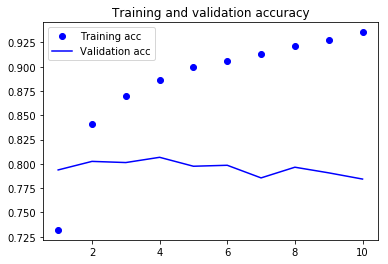

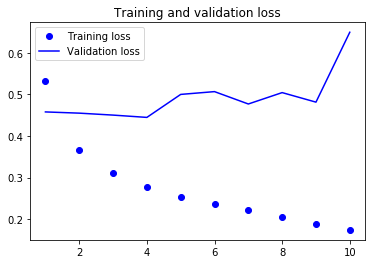

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Cuts off the text after 500 number of words (before it was 50 only)

In [19]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=500)
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 311s 16ms/step - loss: 0.5017 - acc: 0.7659 - val_loss: 0.3343 - val_acc: 0.8676

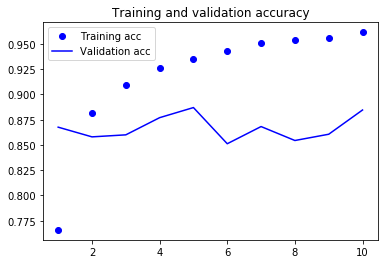

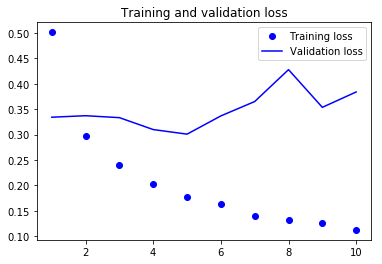

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### This time, you achieve up to 88% validation accuracy. 
***Not bad: certainly much better than the SimpleRNN network - that's largely because LSTM suffers much less from the vanishing-gradient problem—and slightly better than the fully connected approach.***

## Why isn’t LSTM performing better? 
1. One reason is that **you made no effort to tune hyperparameters** such as the embeddings dimensionality or the LSTM output dimensionality. 
2. Another may be **lack of regularization**. But honestly, the primary reason is that analyzing the global, long-term structure of the reviews (what LSTM is good at) isn’t helpful for a sentiment-analysis problem. 
3. **Such a basic problem is well solved by looking at what words occur in each review, and at what frequency**. That’s what the first fully connected approach looked at. But there are far more difficult natural language-processing problems out there, where the strength of LSTM will become apparent: in particular, question-answering and machine translation